In [1]:
from PIL import Image, ImageOps

In [2]:
im1 = Image.open('/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png')
im_invert1 = ImageOps.invert(im1)
im_invert1.save('/home/raja/kmit/classes/invert_brain.png', quality=95)

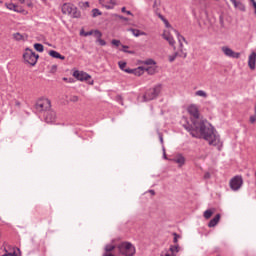

In [4]:
im1

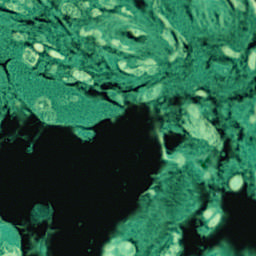

In [5]:
im_invert1

In [6]:
from PIL import Image

col = Image.open("/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png")
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<128 else 255, '1')

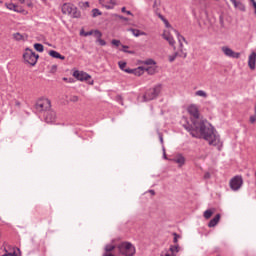

In [7]:
col

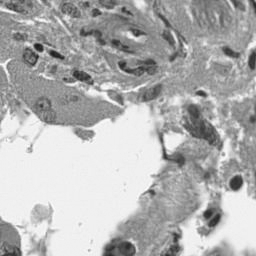

In [8]:
gray

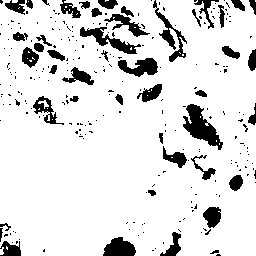

In [9]:
bw

In [10]:
#----- Example Python program for logarithmic transformation of a Digital Image -----
# import Pillow modules
from PIL import Image
from PIL import ImageFilter
import math


# Compute log
def logTransform(c, f):
    g = c * math.log(float(1 + f),10);
    return g;


# Apply logarithmic transformation for an image  
def logTransformImage(image, outputMax = 255, inputMax=255):
    c = outputMax/math.log(inputMax+1,10);
    # Read pixels and apply logarithmic transformation
    for i in range(0, image.size[0]-1):
        for j in range(0, image.size[1]-1):
            # Get pixel value at (x,y) position of the image
            f = image.getpixel((i,j));
         

            # Do log transformation of the pixel
            redPixel    = round(logTransform(c, f[0]));
            greenPixel  = round(logTransform(c, f[1]));
            bluePixel   = round(logTransform(c, f[2]));


            # Modify the image with the transformed pixel values
            image.putpixel((i,j),(redPixel, greenPixel, bluePixel));
    return image;
 

# Display the original image
imageFileName = "/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png";

img5 = Image.open(imageFileName);
#img.show();


# Display the image after applying the logarithmic transformation
logTransformedImage = logTransformImage(img5);

#logTransformedImage.show();

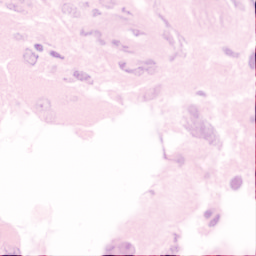

In [11]:
img5

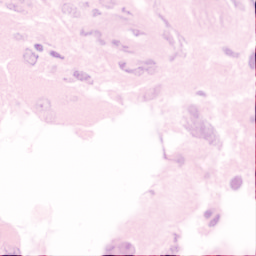

In [12]:
logTransformedImage

input y :0.5
min: 6.244997998398398 max: 15.968719422671311


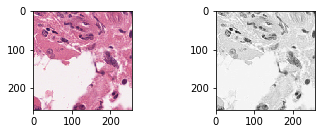

In [14]:
import numpy
import matplotlib.pyplot as plt
from copy import deepcopy
from PIL import Image
from math import cos, sin


def getGrayColor(rgb):
    return rgb[0]


def setGrayColor(color):
    return [color, color, color]


img = Image.open('/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png')
img = numpy.asarray(img)

c = 1
y = float(input("input y :"))

# copy list not reference
pwl = deepcopy(img)


min = 99999999999999
max = 0

for i in range(len(img)):
    for j in range(len(img[i])):
        s = (c*img[i][j][0])**y
        if(s > max):
            max = s
        if(s < min):
            min = s

for i in range(len(img)):
    for j in range(len(img[i])):
        s = (c*img[i][j][0])**y
        s = (s-min)/(max-min)
        s = s*254
        pwl[i][j] = setGrayColor(s)

print('min:',min,'max:',max)

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(pwl)


plt.show()

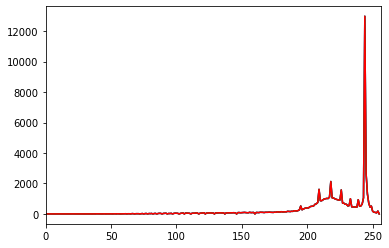

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([pwl],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

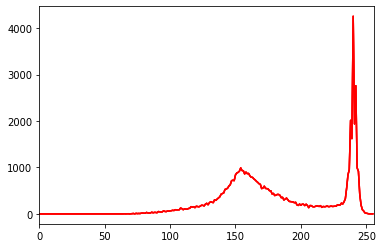

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[2],None,[256],[0,256])
    plt.plot(histr,color = 'r')
    plt.xlim([0,256])
plt.show()

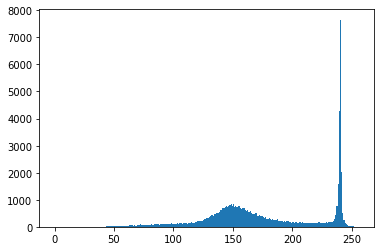

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/raja/kmit/classes/TCGA-CS-4938-01Z-00-DX1_20x_17248_8864_256x256.png',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()